## Assignment 1 : Training Data Summary
## Keertana Chidambaram & Dhruval Bhatt

The goal of the prediction challenge is to build a predictor for the number of drinks per day in the last 30 days. Here we conduct an initial exploration of the data to get a feel for the information available.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Basic Information of Data

In [2]:
df = pd.read_csv('nlsy training set.csv')

FileNotFoundError: [Errno 2] File b'nlsy training set.csv' does not exist: b'nlsy training set.csv'

In [3]:
df.head()

,Unnamed: 0,E5011701,E5011702,E5011703,E5011704,E5011705,E5011706,E5011707,E5011708,E5011709,...,Z9122600,Z9141400,Z9141500,Z9141600,Z9141700,Z9141800,Z9141900,Z9142000,Z9142100,diag.id
0,6328,-4,-4,2,2,2,1,1,2,2,...,16,-4,-4,-4,-4,-4,-4,-4,-4,6328
1,388,-4,-4,-4,-4,-4,-4,-4,2,2,...,17,7500,0,0,6,0,7500,0,18,388
2,7655,-4,-4,-4,2,2,4,4,2,2,...,16,-4,-4,-4,-4,-4,-4,-4,-4,7655
3,3517,-4,-4,-4,2,2,2,1,1,2,...,16,-4,-4,-4,-4,-4,-4,-4,-4,3517
4,8540,-4,-4,-4,-4,-4,-4,2,2,2,...,16,-4,-4,-4,-4,-4,-4,-4,-4,8540


In [4]:
df.shape

(7187, 4887)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7187 entries, 0 to 7186
Columns: 4887 entries, Unnamed: 0 to diag.id
dtypes: int64(4887)
memory usage: 268.0 MB


Data contains 7187 observations with 4887 variables. Of which, 4886 are predictor variables and 1 will be the target variable. From the meta data file, we see that all the variables are categorical (both nominal and ordinal) and are coded as integers. As seen in the dataframe summary information above and the dataframe snapshot, all variables are coded as integers and the missing values are coded as negative integers.

From a quick overview of the meta data, we see that it includes time series variables such as monthly school attendance from 1997 to 2009 and college enrollment from 1997 to 2016 and some are ordinal categorical variables such as year of first pregnancy. However, there are so many variables for manual inspection, so using a feature selection algorithm would be a good next step.

### Exploring Data Missingness

Since the negative variables indicate missing variables, to check the number of missing variables per column the data frame is filtered where the value is less than zero and the histogram is plotted, as shown below.

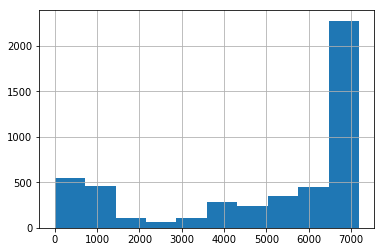

In [6]:
missing = df.where(df < 0).count()
ax = missing.hist()

For as many as 1000 variables, most observation is missing yet all IDs are present. The percentage of missing data is calculated as shown below. From which, we see, approximately 69% of the data is missing. This data set is a high-dimensional data with sparse observations, so machine learning is a good tool for prediction.

In [7]:
(sum(missing) * 100) / (7187 * 4887)

69.03836358015059

### Exploring the Target Variable

The target variable in the data is, "U1031900" and the following exploration summarizes the key characteristics of the responses recorded for this variable.

#### Descriptive Statistics of Target Variable

In [8]:
df['U1031900'].describe()

count    7187.000000
mean       -0.637123
std         4.702855
min        -5.000000
25%        -4.000000
50%        -2.000000
75%         2.000000
max        70.000000
Name: U1031900, dtype: float64

In [9]:
print("The unique values coded in the target variable: \n", df['U1031900'].unique())
print(' ')
print("The maximum value in the target variable: \n", df['U1031900'].max())

The unique values coded in the target variable: 
 [-4  5 -5  7  2  1 -2  8  4  3  6 20 10 12 30 19 -1 15  0 45 60 28 50 18
 35 22 14 25  9 70 65 16 23]
 
The maximum value in the target variable: 
 70


In [10]:
df['U1031900'].mode()

0   -4
dtype: int64

The range of target variable is: minimum drinks = 0, maximum drinks = 70. While the much of the data is missing a response, of the responses, the most common response is 2 drinks. The unique values, shown above, shows a quick sample of the numbers of responses collected. The plot below shows the distribution of the reponses recieved.

Text(0,0.5,'Count of Responses')

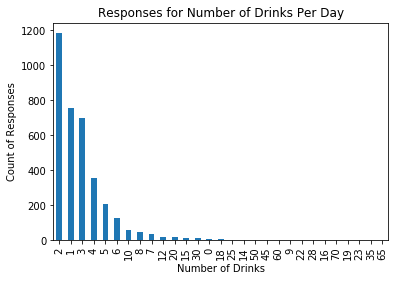

In [11]:
f_df = df[df['U1031900'] >= 0]
ax = f_df['U1031900'].value_counts().plot('bar', title="Responses for Number of Drinks Per Day")
ax.set_xlabel("Number of Drinks")
ax.set_ylabel("Count of Responses")

#### Missingness

Specifically looking at the target variable (U1031900), about 50% of the target variable value is missing as calculated below and the plot shows the missing data by type. 

In [12]:
sum(df['U1031900'] < 0) * 100 / len(df['U1031900'])

50.67482955336023

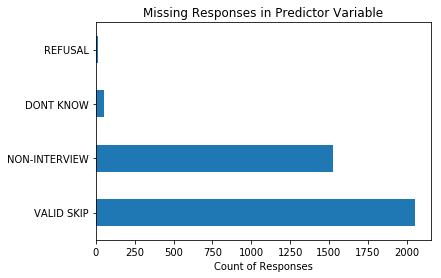

In [13]:
f_df = df[df['U1031900'] < 0]

fig, ax = plt.subplots()
ax = f_df['U1031900'].value_counts().plot('barh', title="Missing Responses in Predictor Variable", ax=ax)
#ax.set_ylabel("Reason")
ax.set_xlabel("Count of Responses")

a=ax.get_yticks().tolist();
a[0]='VALID SKIP';
a[1] = 'NON-INTERVIEW';
a[2] = 'DONT KNOW';
a[3] = 'REFUSAL';
ax.set_yticklabels(a);